### 1007 Walmart Sales Fluctuation during Storm Range
#### Data: https://www.kaggle.com/c/walmart-recruiting-sales-in-stormy-weather
##### Sheetal Laad, Elliot Silva, Orion Taylor


#### Import the necessary packages

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#### Import the datasets

In [2]:
weather = pd.read_csv('weather.csv')
key = pd.read_csv('key.csv')
train = pd.read_csv('train.csv')

#### Clean dataset and and features

In [4]:
def clean_dataset(weather):
    weather_clean = weather.loc[:,['station_nbr','date','snowfall','preciptotal']]

    # clean snowfall column
    weather_clean.loc[weather_clean.snowfall=='M','snowfall']=0
    weather_clean.loc[weather_clean.snowfall=="  T",'snowfall']=0
    weather_clean['snowfall']=pd.to_numeric(weather_clean['snowfall'])

    # clean preciptotal column
    weather_clean.loc[weather_clean.preciptotal=='M','preciptotal']=0
    weather_clean.loc[weather_clean.preciptotal=="  T",'preciptotal']=0
    weather_clean['preciptotal']=pd.to_numeric(weather_clean['preciptotal'])
    
    return weather_clean

In [5]:
def add_weather_intensity_column(weather):
    mask=(weather['snowfall']>2) | (weather['preciptotal']>1)
    mask.value_counts()
    weather['weather_event']=mask.astype(int)
    return weather

In [10]:
#Clean weather dataset
weather_clean=clean_dataset(weather)

#### Merge store data with weather data based on key dataset

In [11]:
def create_stores(train,key,weather):
    stores=train.merge(key,on='store_nbr')
    stores=stores.merge(weather,how='left',on=['station_nbr','date'])
    stores['date']=pd.to_datetime(stores['date'])
    stores['units']=pd.to_numeric(stores['units'])
    return stores

In [12]:
## THIS CELL CREATES "STORES" DATAFRAME
stores=create_stores(train,key,weather_clean)

print(stores.shape)
print("Number of Stores:", len(stores['store_nbr'].unique()))
print("Number of Items:", len(stores['item_nbr'].unique()))
stores.head(10)

(4617600, 7)
Number of Stores: 45
Number of Items: 111


,date,store_nbr,item_nbr,units,station_nbr,snowfall,preciptotal
0,2012-01-01,1,1,0,1,0.0,0.05
1,2012-01-01,1,2,0,1,0.0,0.05
2,2012-01-01,1,3,0,1,0.0,0.05
3,2012-01-01,1,4,0,1,0.0,0.05
4,2012-01-01,1,5,0,1,0.0,0.05
5,2012-01-01,1,6,0,1,0.0,0.05
6,2012-01-01,1,7,0,1,0.0,0.05
7,2012-01-01,1,8,0,1,0.0,0.05
8,2012-01-01,1,9,29,1,0.0,0.05
9,2012-01-01,1,10,0,1,0.0,0.05


In [17]:
#Creating dataframe of only weather events
mask = (weather_clean.snowfall > 2) | (weather_clean.preciptotal > 1)
weather_events = weather_clean[mask][['station_nbr', 'date', 'snowfall', 'preciptotal']]
weather_events.date = pd.to_datetime(weather_events.date)
weather_events.head()

,station_nbr,date,snowfall,preciptotal
168,18,2012-01-09,0.0,1.32
170,20,2012-01-09,0.0,1.58
210,2,2012-01-12,3.6,1.06
222,15,2012-01-12,3.7,0.34
226,19,2012-01-12,6.1,0.35


#### Adding weather range

In [18]:
def is_event(store_station, store_date):
    weather_events_stationx = weather_events[weather_events.station_nbr == store_station]
    if store_date in list(weather_events_stationx.date):
        return 1
    else:
        return 0
    
def is_minus3(store_station, store_date):
    weather_events_stationx = weather_events[weather_events.station_nbr == store_station]
    
    for d in list(weather_events_stationx.date):
        if store_date == d - datetime.timedelta(days=3):
            return 1
    return 0

def is_minus2(store_station, store_date):
    weather_events_stationx = weather_events[weather_events.station_nbr == store_station]
    
    for d in list(weather_events_stationx.date):
        if store_date == d - datetime.timedelta(days=2):
            return 1
    return 0

def is_minus1(store_station, store_date):
    weather_events_stationx = weather_events[weather_events.station_nbr == store_station]
    
    for d in list(weather_events_stationx.date):
        if store_date == d - datetime.timedelta(days=1):
            return 1
    return 0

def is_plus3(store_station, store_date):
    weather_events_stationx = weather_events[weather_events.station_nbr == store_station]
    
    for d in list(weather_events_stationx.date):
        if store_date == d + datetime.timedelta(days=2):
            return 1
    return 0

def is_plus2(store_station, store_date):
    weather_events_stationx = weather_events[weather_events.station_nbr == store_station]
    
    for d in list(weather_events_stationx.date):
        if store_date == d + datetime.timedelta(days=2):
            return 1
    return 0

def is_plus1(store_station, store_date):
    weather_events_stationx = weather_events[weather_events.station_nbr == store_station]
    
    for d in list(weather_events_stationx.date):
        if store_date == d + datetime.timedelta(days=1):
            return 1
    return 0

def is_inrange3(store_station, store_date):
    weather_events_stationx = weather_events[weather_events.station_nbr == store_station]
    
    for d in list(weather_events_stationx.date):
        if store_date >= d - datetime.timedelta(days=3) and store_date <= d + datetime.timedelta(days=3):
            return 1
    return 0

def is_inrange2(store_station, store_date):
    weather_events_stationx = weather_events[weather_events.station_nbr == store_station]
    
    for d in list(weather_events_stationx.date):
        if store_date >= d - datetime.timedelta(days=2) and store_date <= d + datetime.timedelta(days=2):
            return 1
    return 0

def is_inrange1(store_station, store_date):
    weather_events_stationx = weather_events[weather_events.station_nbr == store_station]
    
    for d in list(weather_events_stationx.date):
        if store_date >= d - datetime.timedelta(days=1) and store_date <= d + datetime.timedelta(days=1):
            return 1
    return 0

def range_val(is_minus3, weather_event, is_plus3):
    if weather_event == 1:
        return 'day of storm'
    else:
        if is_minus3 == 1:
            return 'before storm'
        if is_plus3 == 1:
            return 'post storm'
    return 'without storm'

In [19]:
# Create columns for weather_event, +- 3 range, in_range for each unique date, station_nbr

stores_station_uniq = stores[['date', 'station_nbr', 'snowfall', 'preciptotal']].drop_duplicates()

stores_station_uniq['weather_event']  = stores_station_uniq.apply(lambda x: is_event(x['station_nbr'], x['date']), axis = 1)
stores_station_uniq['is_inrange3']  = stores_station_uniq.apply(lambda x: is_inrange3(x['station_nbr'], x['date']), axis = 1)
stores_station_uniq['is_inrange2']  = stores_station_uniq.apply(lambda x: is_inrange2(x['station_nbr'], x['date']), axis = 1)
stores_station_uniq['is_inrange1']  = stores_station_uniq.apply(lambda x: is_inrange1(x['station_nbr'], x['date']), axis = 1)
stores_station_uniq['is_minus3']  = stores_station_uniq.apply(lambda x: is_minus3(x['station_nbr'], x['date']), axis = 1)
stores_station_uniq['is_minus2']  = stores_station_uniq.apply(lambda x: is_minus2(x['station_nbr'], x['date']), axis = 1)
stores_station_uniq['is_minus1']  = stores_station_uniq.apply(lambda x: is_minus1(x['station_nbr'], x['date']), axis = 1)
stores_station_uniq['is_plus3']  = stores_station_uniq.apply(lambda x: is_plus3(x['station_nbr'], x['date']), axis = 1)
stores_station_uniq['is_plus2']  = stores_station_uniq.apply(lambda x: is_plus2(x['station_nbr'], x['date']), axis = 1)
stores_station_uniq['is_plus1']  = stores_station_uniq.apply(lambda x: is_plus1(x['station_nbr'], x['date']), axis = 1)

stores_station_uniq['range_type']  = stores_station_uniq.apply(lambda x: range_val(x['is_minus3'], x['weather_event'], x['is_plus3']), axis = 1)

In [20]:
stores_weatherinfo = pd.merge(stores, stores_station_uniq, how = 'left', on = ['station_nbr', 'date', 'snowfall', 'preciptotal'])
stores_weatherinfo.head(10)

,date,store_nbr,item_nbr,units,station_nbr,snowfall,preciptotal,weather_event,is_inrange3,is_inrange2,is_inrange1,is_minus3,is_minus2,is_minus1,is_plus3,is_plus2,is_plus1,range_type
0,2012-01-01,1,1,0,1,0.0,0.05,0,0,0,0,0,0,0,0,0,0,without storm
1,2012-01-01,1,2,0,1,0.0,0.05,0,0,0,0,0,0,0,0,0,0,without storm
2,2012-01-01,1,3,0,1,0.0,0.05,0,0,0,0,0,0,0,0,0,0,without storm
3,2012-01-01,1,4,0,1,0.0,0.05,0,0,0,0,0,0,0,0,0,0,without storm
4,2012-01-01,1,5,0,1,0.0,0.05,0,0,0,0,0,0,0,0,0,0,without storm
5,2012-01-01,1,6,0,1,0.0,0.05,0,0,0,0,0,0,0,0,0,0,without storm
6,2012-01-01,1,7,0,1,0.0,0.05,0,0,0,0,0,0,0,0,0,0,without storm
7,2012-01-01,1,8,0,1,0.0,0.05,0,0,0,0,0,0,0,0,0,0,without storm
8,2012-01-01,1,9,29,1,0.0,0.05,0,0,0,0,0,0,0,0,0,0,without storm
9,2012-01-01,1,10,0,1,0.0,0.05,0,0,0,0,0,0,0,0,0,0,without storm


### stores_weatherinfo DF

In [22]:
#Match the above unique pairs to all rows
stores_weatherinfo['snowfall'] = stores_weatherinfo['snowfall'].fillna(0)
stores_weatherinfo['preciptotal'] = stores_weatherinfo['preciptotal'].fillna(0)

#Adding day of week, month, year columns
stores_weatherinfo['day'] = stores_weatherinfo['date'].dt.weekday
stores_weatherinfo['month'] = stores_weatherinfo['date'].dt.month
stores_weatherinfo['year'] = stores_weatherinfo['date'].dt.year
stores_weatherinfo['weekend'] = stores_weatherinfo['day'].map({0: 1, 1:0, 2: 0, 3: 0, 4: 0, 5: 1, 6:1})

stores_weatherinfo.head()

,date,store_nbr,item_nbr,units,station_nbr,snowfall,preciptotal,weather_event,is_inrange3,is_inrange2,...,is_minus2,is_minus1,is_plus3,is_plus2,is_plus1,range_type,day,month,year,weekend
0,2012-01-01,1,1,0,1,0.0,0.05,0,0,0,...,0,0,0,0,0,without storm,6,1,2012,1
1,2012-01-01,1,2,0,1,0.0,0.05,0,0,0,...,0,0,0,0,0,without storm,6,1,2012,1
2,2012-01-01,1,3,0,1,0.0,0.05,0,0,0,...,0,0,0,0,0,without storm,6,1,2012,1
3,2012-01-01,1,4,0,1,0.0,0.05,0,0,0,...,0,0,0,0,0,without storm,6,1,2012,1
4,2012-01-01,1,5,0,1,0.0,0.05,0,0,0,...,0,0,0,0,0,without storm,6,1,2012,1


### stores DF

In [51]:
stores = stores_weatherinfo.fillna(0)
stores = stores.drop('station_nbr', axis = 1)

stores['weather_event'] = stores['weather_event'].astype(int)
stores['day'] = stores['date'].dt.weekday.map({0:'Mon', 1:'Tues', 2:'Weds', 3:'Thurs', 
                                               4:'Fri', 5:'Sat', 6:'Sun'})
stores['month'] = stores['date'].dt.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 
                                               6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 
                                               11: 'Nov', 12:'Dec'})
stores['year'] = stores['date'].dt.year

stores = stores.rename(columns={'date':'Date', 'store_nbr':'Store', 'item_nbr':'Item', 
                                'units':'Sales', 'snowfall':'Snow', 'preciptotal':'Rain', 
                                'weather_event':'Storm', 'is_minus3': 'Pre3', 'is_plus3': 'Post3',
                                'is_minus2': 'Pre2', 'is_plus2': 'Post2', 'is_minus1': 'Pre1',
                                'is_plus1': 'Post1', 'day': 'Weekday', 'month':'Month', 'year':'Year', 'weekend': 'Weekend'})

stores = stores[['Store', 'Item', 'Year', 'Month', 'Date', 'Weekday', 'Sales', 
                 'Snow', 'Rain', 'Pre3', 'Pre2', 'Pre1', 'Storm', 'Post1', 'Post2', 'Post3', 'Weekend']]
stores.head()

,Store,Item,Year,Month,Date,Weekday,Sales,Snow,Rain,Pre3,Pre2,Pre1,Storm,Post1,Post2,Post3,Weekend
0,1,1,2012,Jan,2012-01-01,Sun,0,0.0,0.05,0,0,0,0,0,0,0,1
1,1,2,2012,Jan,2012-01-01,Sun,0,0.0,0.05,0,0,0,0,0,0,0,1
2,1,3,2012,Jan,2012-01-01,Sun,0,0.0,0.05,0,0,0,0,0,0,0,1
3,1,4,2012,Jan,2012-01-01,Sun,0,0.0,0.05,0,0,0,0,0,0,0,1
4,1,5,2012,Jan,2012-01-01,Sun,0,0.0,0.05,0,0,0,0,0,0,0,1


#### Creating storm intensity

In [24]:
stores_weatherinfo.preciptotal[stores_weatherinfo.preciptotal>1].describe()

count    51948.000000
mean         1.929038
std          1.110474
min          1.010000
25%          1.160000
50%          1.460000
75%          2.350000
max          7.360000
Name: preciptotal, dtype: float64

In [25]:
stores_weatherinfo.snowfall[stores_weatherinfo.snowfall>2].describe()

count    5217.000000
mean        5.548936
std         3.631764
min         2.100000
25%         3.200000
50%         4.300000
75%         6.100000
max        16.200000
Name: snowfall, dtype: float64

In [26]:
#Used the above quantiles to define intensity
def precip_intensity(x):
    if x > 1:
        if x <= 1.160000:
            return int(1)
        elif x <= 1.460000:
            return int(2)
        elif x <= 2.350000:
            return int(3)
        else:
            return int(4)
    else:
        return int(0)
def snowfall_intensity(x):
    if x > 2:
        if x <= 3.200000:
            return int(1)
        elif x <= 4.300000:
            return int(2)
        elif x <= 6.100000:
            return int(3)
        else:
            return int(4)
    else:
        return int(0)
    
# Defining Event Intensity as the Max intensity of snowfall intensity  and preciptotal intensity
def event_intensity(snowfall_intensity, precip_intensity):
    return max(snowfall_intensity, precip_intensity)

In [27]:
stores_weatherinfo['preciptotal_intensity'] = stores_weatherinfo.preciptotal.apply(precip_intensity)
stores_weatherinfo['snowfall_intensity'] = stores_weatherinfo.snowfall.apply(snowfall_intensity)
stores_weatherinfo['event_intensity'] = stores_weatherinfo.apply(lambda x: event_intensity(x['snowfall_intensity'], x['preciptotal_intensity']), axis = 1)
stores_weatherinfo.head()

,date,store_nbr,item_nbr,units,station_nbr,snowfall,preciptotal,weather_event,is_inrange3,is_inrange2,...,is_plus2,is_plus1,range_type,day,month,year,weekend,preciptotal_intensity,snowfall_intensity,event_intensity
0,2012-01-01,1,1,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
1,2012-01-01,1,2,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
2,2012-01-01,1,3,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
3,2012-01-01,1,4,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
4,2012-01-01,1,5,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0


In [52]:
stores['RainIntensity'] = stores['Rain'].apply(precip_intensity)
stores['SnowIntensity'] = stores['Snow'].apply(snowfall_intensity)
stores['Intensity'] = stores.apply(lambda x: event_intensity(x['SnowIntensity'], x['RainIntensity']), axis = 1)
stores.head()

,Store,Item,Year,Month,Date,Weekday,Sales,Snow,Rain,Pre3,Pre2,Pre1,Storm,Post1,Post2,Post3,Weekend,RainIntensity,SnowIntensity,Intensity
0,1,1,2012,Jan,2012-01-01,Sun,0,0.0,0.05,0,0,0,0,0,0,0,1,0,0,0
1,1,2,2012,Jan,2012-01-01,Sun,0,0.0,0.05,0,0,0,0,0,0,0,1,0,0,0
2,1,3,2012,Jan,2012-01-01,Sun,0,0.0,0.05,0,0,0,0,0,0,0,1,0,0,0
3,1,4,2012,Jan,2012-01-01,Sun,0,0.0,0.05,0,0,0,0,0,0,0,1,0,0,0
4,1,5,2012,Jan,2012-01-01,Sun,0,0.0,0.05,0,0,0,0,0,0,0,1,0,0,0


In [66]:
np.arange(1, 112)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111])

#### Creates plots for sales for specified dates, item, store

In [143]:
def subsetplot(dataframe, store = np.arange(1, 46), item = np.arange(1, 112), year=[2012, 2013, 2014], 
               month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']):
    index = pd.IndexSlice
    group_all = dataframe.loc[index[store, item, year, month], :].copy()
    group_storm = group_all.loc[group_all['Storm'] == 1].copy()
    group_prestorm3 = group_all.loc[group_all['Pre3'] == 1].copy()
    group_poststorm3 = group_all.loc[group_all['Post3'] == 1].copy()
    group_prestorm2 = group_all.loc[group_all['Pre2'] == 1].copy()
    group_poststorm2 = group_all.loc[group_all['Post2'] == 1].copy()   
    group_prestorm1 = group_all.loc[group_all['Pre1'] == 1].copy()
    group_poststorm1 = group_all.loc[group_all['Post1'] == 1].copy()   
    print('Store:   '+str(store)+'\nItem:    '+str(item)
          +'\nYear:    '+str(year) +'\nMonth:   '+str(month)
          +'\nShape:   '+str(group_all.shape[0])+' rows, '
          +str(group_all.shape[1])+' columns')

    fig, ax = plt.subplots(figsize=(18, 6))
    plt.bar(list(group_all['Date']), group_all['Sales'], label='Regular Days', color='#A9CCE3')
    plt.bar(list(group_prestorm3['Date']), group_prestorm3['Sales'], color='#7FB3D5')
    plt.bar(list(group_poststorm3['Date']), group_poststorm3['Sales'], color='#7FB3D5')
    plt.bar(list(group_prestorm2['Date']), group_prestorm2['Sales'], color='#5499C7')
    plt.bar(list(group_poststorm2['Date']), group_poststorm2['Sales'], color='#5499C7')
    plt.bar(list(group_prestorm1['Date']), group_prestorm1['Sales'], color='#2471A3')
    plt.bar(list(group_poststorm1['Date']), group_poststorm1['Sales'], color='#2471A3')
    plt.bar(list(group_storm['Date']), group_storm['Sales'], label='Stormy Days', color='#2E4053')
    plt.xlabel('Timeframe')
    plt.ylabel('Units Sold')

    if type(store) == int:
        store_list = str(store)
    else:   
        store_list = ' '.join(str(x) for x in store)
    
    if type(item) == int:
        item_list = str(item)
    else:
        item_list = ' '.join(str(x) for x in item)
    
    plt.title('Store #%s: Item #%s' %(store_list, item_list))
    plt.legend()
    plt.show()

In [73]:
# MultiIndex by store_nbr and item_nbr, then sort item_nbr so that rows are chronological per combination 
# of store_nbr and item_nbr

grouped = stores.set_index(['Store', 'Item', 'Year', 'Month'])
grouped.head()

Date Weekday  Sales  Snow  Rain  Pre3  Pre2  Pre1  \
Store Item Year Month                                                           
1     1    2012 Jan   2012-01-01     Sun      0   0.0  0.05     0     0     0   
      2    2012 Jan   2012-01-01     Sun      0   0.0  0.05     0     0     0   
      3    2012 Jan   2012-01-01     Sun      0   0.0  0.05     0     0     0   
      4    2012 Jan   2012-01-01     Sun      0   0.0  0.05     0     0     0   
      5    2012 Jan   2012-01-01     Sun      0   0.0  0.05     0     0     0   

                       Storm  Post1  Post2  Post3  Weekend  RainIntensity  \
Store Item Year Month                                                       
1     1    2012 Jan        0      0      0      0        1              0   
      2    2012 Jan        0      0      0      0        1              0   
      3    2012 Jan        0      0      0      0        1              0   
      4    2012 Jan        0      0      0      0        1              0   
      5    2012 Jan        0      0      0      0        1              0   

                       SnowIntensity  Intensity  
Store Item Year Month                            
1     1    2012 Jan                0          0  
      2    2012 Jan                0          0  
      3    2012 Jan                0          0  
      4    2012 Jan                0          0  
      5    2012 Jan                0          0

In [74]:
# Print shape of total grouped DataFrame

print('Total Data:   '+str(grouped.shape[0])+' rows, '+str(grouped.shape[1])+' columns')

Total Data:   4617600 rows, 16 columns


In [179]:
#Returns list of items by store that have higher average than 5 sales
def get_highval_items(store):
    averages = grouped.reset_index()[grouped.reset_index().Store == store][['Item', 'Sales']].groupby(['Item']).mean()
    avg_highvals = averages[averages.Sales > 5]
    return avg_highvals.index.tolist()

Store:   1
Item:    [9, 28]
Year:    [2012, 2013, 2014]
Month:   ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Shape:   1858 rows, 16 columns


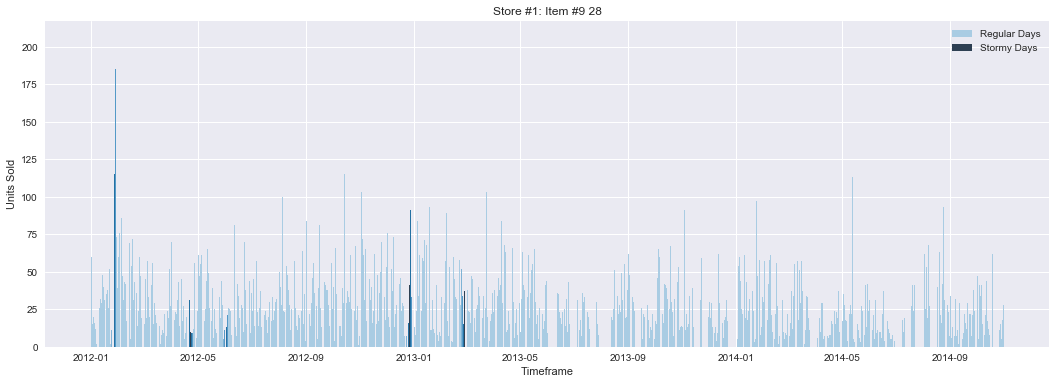

Store:   2
Item:    [5, 44]
Year:    [2012, 2013, 2014]
Month:   ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Shape:   1750 rows, 16 columns


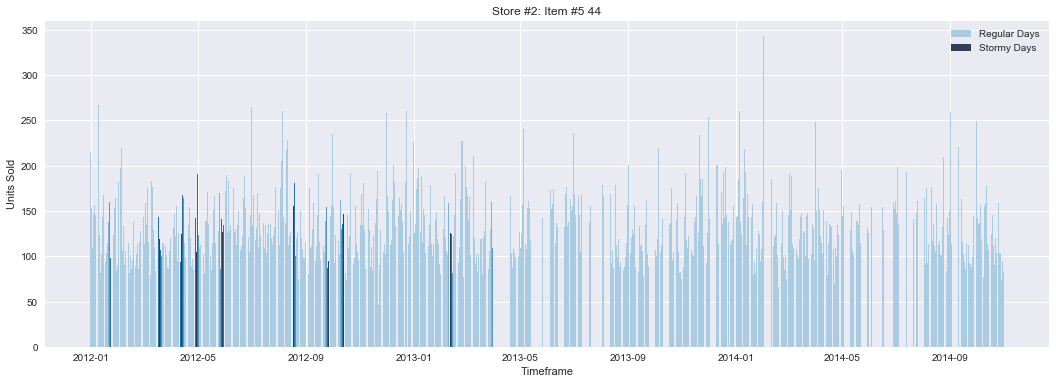

Store:   3
Item:    [5, 45]
Year:    [2012, 2013, 2014]
Month:   ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Shape:   1792 rows, 16 columns


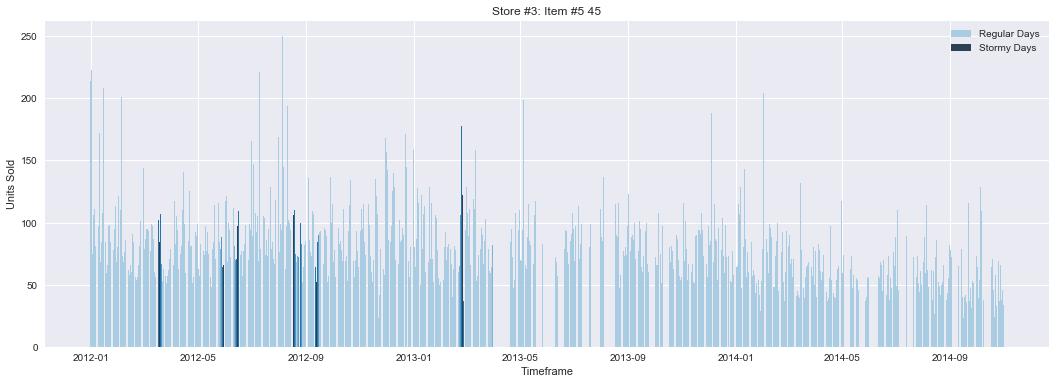

Store:   4
Item:    [9, 27]
Year:    [2012, 2013, 2014]
Month:   ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Shape:   1920 rows, 16 columns


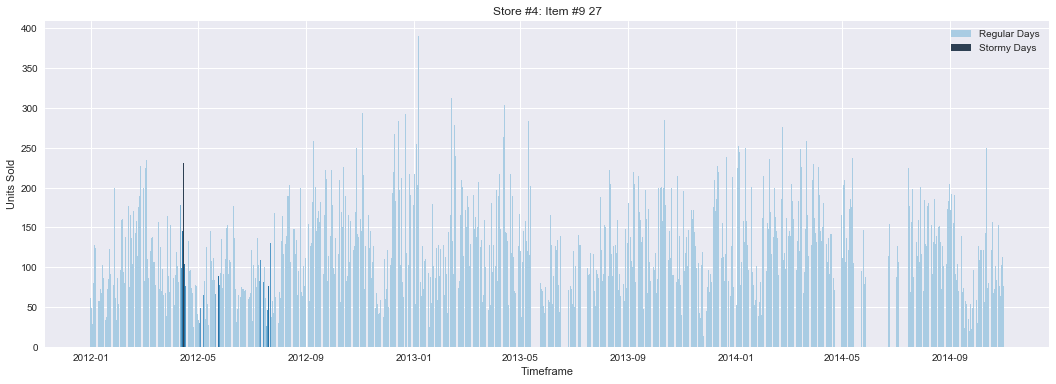

In [184]:
sn.set(font_scale=1)
   
for i in range(1,5):
    highval_items = get_highval_items(i)
    subsetplot(grouped.sort_index(), i, highval_items)

Store:   [2, 3]
Item:    5
Year:    [2012, 2013, 2014]
Month:   ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Shape:   1771 rows, 16 columns


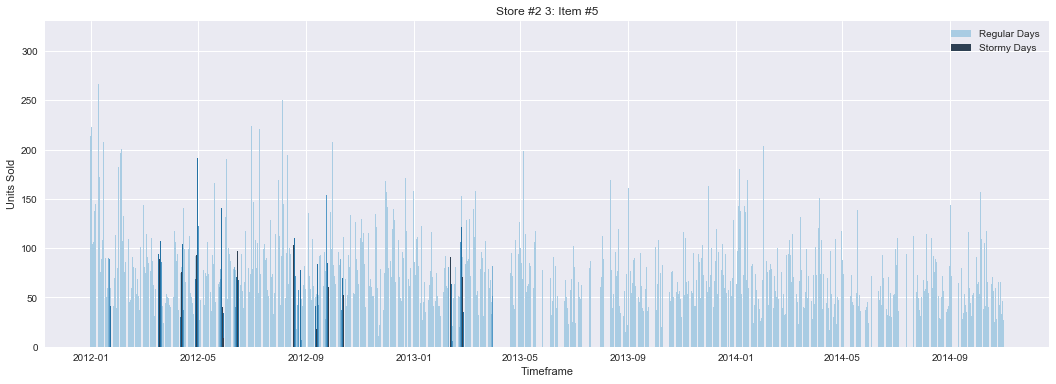

In [185]:
subsetplot(grouped.sort_index(), [2, 3], 5)

Store:   2
Item:    5
Year:    2012
Month:   ['Apr', 'May']
Shape:   61 rows, 16 columns


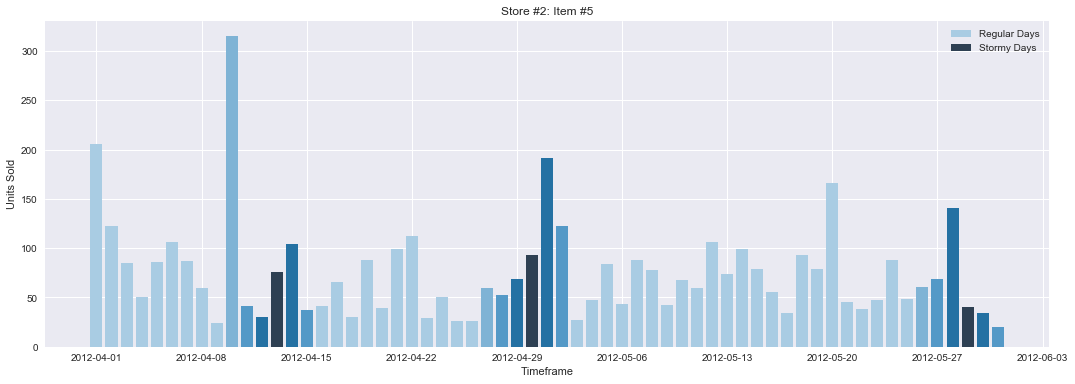

Store:   3
Item:    5
Year:    2012
Month:   ['May', 'Jun']
Shape:   61 rows, 16 columns


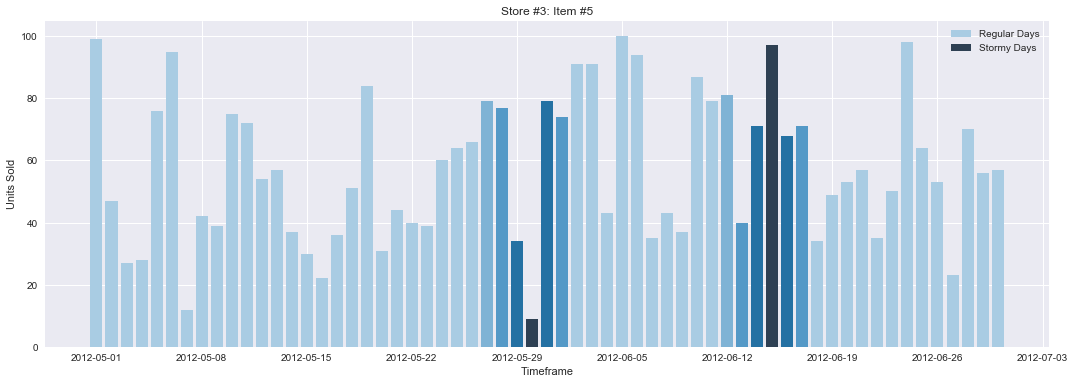

In [189]:
subsetplot(grouped.sort_index(), 2, 5, 2012, ['Apr', 'May'])
subsetplot(grouped.sort_index(), 3, 5, 2012, ['May', 'Jun'])

Store:   12
Item:    16
Year:    2012
Month:   Jun
Shape:   30 rows, 16 columns


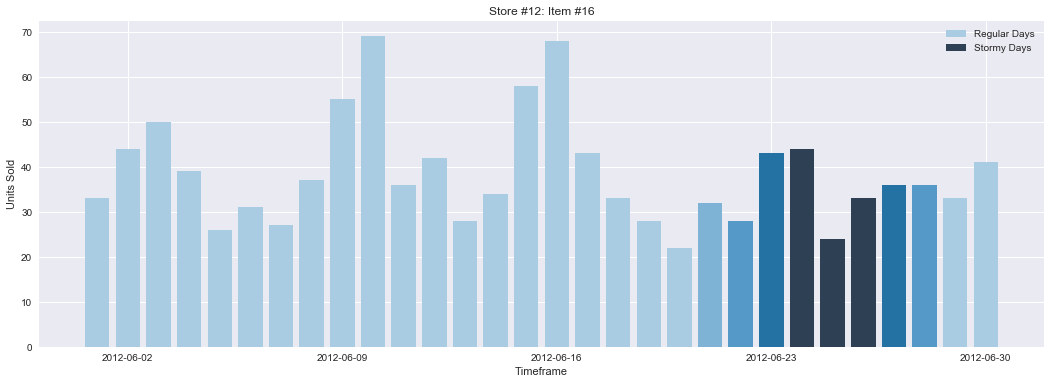

In [190]:
#Storm for multiple days in a row ~7.3 inch rain
subsetplot(grouped.sort_index(), 12, 16, 2012, 'Jun')

## Can we comment what this does?

In [206]:
#CREATES DF FOR GRAPH
storesale_means = stores_weatherinfo[['store_nbr','item_nbr', 'range_type', 'units']].groupby(['store_nbr','item_nbr']).mean()
#filter_greaterthan10 = storesale_means.units > 10
filtered_storeunitcombos = storesale_means.reset_index().drop('units', axis = 1)
filtered_means = pd.merge(filtered_storeunitcombos, stores_weatherinfo, how = 'left', on = ['store_nbr', 'item_nbr']).groupby(['store_nbr','item_nbr', 'range_type']).mean()
filtered_means_byrangetype = filtered_means.reset_index().groupby(['item_nbr', 'store_nbr', 'range_type']).mean()

In [207]:
def create_plot_byitem(dataset_groupedmeans, item_number):
    data = dataset_groupedmeans.reset_index()
    N = data[data.item_nbr == item_number].shape[0]
    store_labels = data[data.item_nbr == item_number].store_nbr.unique()
    store_count = np.arange(len(store_labels))
    c = ['#5499C7' if i == 'before storm' else '#2E4053' if i == 'day of storm' else '#5499C7' if i == 'post storm' else '#A9CCE3' for i in data.range_type]

    ind = np.arange(N)    # the x locations for the groups
    width = 0.5  # the width of the bars
    x_label = ('before storm', 'day of storm', 'post storm', 'without storm')

    index = pd.IndexSlice
    group_all = dataset_groupedmeans.loc[index[item_number, :], :]


    fig, ax = plt.subplots()
    fig.set_size_inches(max(N/3, 5), 6)
    p1 = ax.bar(ind,group_all.units.values , width, color = c)

    x_linspace = np.arange(1.5, N + 1.5, 4)
    ax.set_xticks(x_linspace)
    ax.set_xticklabels(data[data.item_nbr == item_number].store_nbr.unique().tolist())
    plt.xlabel('Store Number')
    plt.ylabel('Average Units Sold for')
    plt.title('Item Number %d' %item_number)
    ax.legend(p1, x_label)

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

#CREATES PDF SAVED TO CURRENT DIRECTORY
with PdfPages('graphs_bystore.pdf') as pdf:
    for i in range(len(filtered_means_byrangetype.reset_index().item_nbr.unique())):
        fig=create_plot_byitem(filtered_means_byrangetype, filtered_means_byrangetype.reset_index().item_nbr.unique()[i])
        pdf.savefig()
        plt.close()


In [218]:
def create_plot_bystore(dataset_groupedmeans, store_number, item_start = 1, item_end = 111):
    data = dataset_groupedmeans.reset_index()
    data_filtered = data[data.store_nbr == store_number][data.item_nbr <= item_end][data.item_nbr >= item_start]
    N = data_filtered.shape[0]
    item_labels = data_filtered.item_nbr.unique()
    
    item_count = np.arange(len(item_labels))
    c = ['#5499C7' if i == 'before storm' else '#2E4053' if i == 'day of storm' else '#5499C7' if i == 'post storm' else '#A9CCE3' for i in data.range_type]

    ind = np.arange(N)    # the x locations for the groups
    width = 0.5  # the width of the bars
    x_label = ('before storm', 'day of storm', 'post storm', 'without storm')

    index = pd.IndexSlice
    group_all = dataset_groupedmeans.loc[index[item_start : item_end, store_number], :]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(max(N/3, 5), 6)
    p1 = ax.bar(ind,group_all.units.values , width, color = c)

    x_linspace = np.arange(1.5, N + 1.5, 4)
    ax.set_xticks(x_linspace)
    
    
    #ax.set_xticklabels(data[data.store_nbr == store_number].item_nbr.unique().tolist())
    ax.set_xticklabels(item_labels)
    plt.xlabel('Item Number')
    plt.ylabel('Average Units Sold for')
    plt.title('Store Number %d' %store_number)
    ax.legend(p1, x_label)

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

#CREATES PDF SAVED TO CURRENT DIRECTORY
with PdfPages('graph_bystore.pdf') as pdf:
    for i in range(len(filtered_means_byrangetype.reset_index().store_nbr.unique())):
        fig=create_plot_bystore(filtered_means_byrangetype, filtered_means_byrangetype.reset_index().store_nbr.unique()[i], 1, 5)
        pdf.savefig()
        plt.close()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


## Elliot Stuff

In [53]:
### IMPORTANT CELL ###

## Iterates through each store. For each store,
## creates separate database filtering weather_event and non-weather_event days.
## (See below two cells for an example of what these look like)
## Then, finds the mean units sold for each item over those days
## Here, we store the means in a dictionary, to create another dataframe of all these means per store

stores_original=create_stores(train,key,weather)

store_means_high_intensity={}
store_means_low_intensity={}
for store_nbr in stores_original['store_nbr'].unique():
    # high intensity weather events
    weather_events=stores_original[(stores_weatherinfo['weather_event']==1) & (stores_weatherinfo['store_nbr']==store_nbr)]
    weather_events=weather_events[['store_nbr','date','item_nbr','units']]
    weather_events_pivot = weather_events.pivot(index='item_nbr',columns='date',values='units')
    weather_events_pivot['mean'] = weather_events_pivot.mean(axis=1)
    store_means_high_intensity[store_nbr] = weather_events_pivot['mean']
    
    # no weather events
    noweather_events=stores_original[(stores_weatherinfo['weather_event']==0) & (stores_weatherinfo['store_nbr']==store_nbr)]
    noweather_events=noweather_events[['store_nbr','date','item_nbr','units']]
    noweather_events_pivot = noweather_events.pivot(index='item_nbr',columns='date',values='units')
    noweather_events_pivot['mean'] = noweather_events_pivot.mean(axis=1)
    store_means_low_intensity[store_nbr] = noweather_events_pivot['mean']
    
print("done!")

## This will create a DataFrame of the averages sold for each item (indices) at each store (columns)
## We make two DataFrames -- for both high-intensity weather events & low-intensity weather events
high_intensity=pd.DataFrame(store_means_high_intensity)
low_intensity=pd.DataFrame(store_means_low_intensity)

# For each item, determine mean units sold over all stores
high_intensity['mean'] = high_intensity.mean(axis=1)
low_intensity['mean'] = low_intensity.mean(axis=1)

# Sort them in decreasing order
high_intensity = high_intensity.sort_values(by='mean',ascending=False)
low_intensity = low_intensity.sort_values(by='mean',ascending=False)

# determine differences
differences = high_intensity-low_intensity
differences = differences.sort_values(by='mean',ascending=False)
differences.head()

## This will produces differences over ALL stores.
## NOTE: to look at just one store & see biggest differences for that store, just look at that column

done!


,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,mean
item_nbr,,,,,,,,,,,,,,,,,,,,,
93,-1.193723,3.175263,8.919010,2.779058,5.140878,0.00000,5.871683,0.806781,3.208493,5.844636,...,0.000000,2.102258,0.0,-0.330616,6.192316,0.00000,0.921053,5.228113,0.0,2.911429
5,0.000000,5.525276,-2.689539,0.000000,0.000000,0.00000,11.184767,19.474247,8.098938,-0.918959,...,-3.937773,0.000000,0.0,3.088469,0.000000,6.19361,0.000000,-0.161033,0.0,2.508158
48,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.756856
45,0.000000,0.000000,12.103487,0.000000,0.000000,-4.66564,0.000000,0.000000,8.517410,0.000000,...,-1.866203,-3.430459,0.0,2.750895,0.000000,2.51283,0.000000,0.000000,0.0,1.629326
68,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,2.041151,0.00000,0.000000,6.855238,0.0,0.851835


In [110]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics  

In [139]:
stores_weatherinfo.range_type.value_counts()

without storm    4454208
day of storm       56499
before storm       56166
post storm         50727
Name: range_type, dtype: int64

In [226]:
stores_store1 = stores_weatherinfo[stores_weatherinfo.store_nbr == 1]
stores_store1

,date,store_nbr,item_nbr,units,station_nbr,snowfall,preciptotal,weather_event,is_inrange3,is_inrange2,...,is_plus2,is_plus1,range_type,day,month,year,weekend,preciptotal_intensity,snowfall_intensity,event_intensity
0,2012-01-01,1,1,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
1,2012-01-01,1,2,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
2,2012-01-01,1,3,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
3,2012-01-01,1,4,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
4,2012-01-01,1,5,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
5,2012-01-01,1,6,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
6,2012-01-01,1,7,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
7,2012-01-01,1,8,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
8,2012-01-01,1,9,29,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0
9,2012-01-01,1,10,0,1,0.0,0.05,0,0,0,...,0,0,without storm,6,1,2012,1,0,0,0


#### Data modeling and predictions with Linear Regression

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

for i in range(1, 20):
    stores_store_num = stores_weatherinfo[stores_weatherinfo.store_nbr == i]
    var = stores_store_num[['item_nbr', 'units', 'weather_event', 'is_inrange3','is_inrange2', 'is_inrange1','day', 'month', 'year', 'preciptotal_intensity', 'snowfall_intensity']]
    X = var.drop('units', axis = 1)
    Y = var[['units']]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    reg = LinearRegression(fit_intercept=False,normalize=True, n_jobs=2).fit(X_train, y_train)
    #reg.score(X_train, y_train)

    y_pred = reg.predict(X_test)

    print('Store %d - R2: %f, MAE: %f' %(i, r2_score(y_test.values, y_pred), mean_absolute_error(y_test.values, y_pred)))



Store 1 - R2: 0.013419, MAE: 0.791098
Store 2 - R2: 0.008243, MAE: 3.558798
Store 3 - R2: 0.013268, MAE: 2.536156
Store 4 - R2: 0.017663, MAE: 2.837164
Store 5 - R2: 0.015694, MAE: 0.761413
Store 6 - R2: 0.011645, MAE: 2.225262
Store 7 - R2: 0.015340, MAE: 2.076857
Store 8 - R2: 0.018541, MAE: 1.017157
Store 9 - R2: 0.011421, MAE: 2.193337
Store 10 - R2: 0.017358, MAE: 1.825630
Store 11 - R2: 0.003856, MAE: 1.419530
Store 12 - R2: 0.014037, MAE: 1.020303
Store 13 - R2: 0.017447, MAE: 2.900362
Store 14 - R2: 0.014441, MAE: 0.574426
Store 15 - R2: 0.010780, MAE: 2.842261
Store 16 - R2: 0.011205, MAE: 3.564411
Store 17 - R2: 0.014486, MAE: 5.296955
Store 18 - R2: 0.018604, MAE: 0.588954
Store 19 - R2: 0.004551, MAE: 0.581771
